In [1]:
#Statistical computation
import math

#Data Manipulation
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Get and read data
titanic_train = pd.read_csv('titanic_train.csv')

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#check data info
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

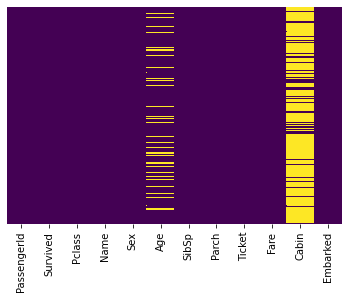

In [5]:
#visualize data before cleaning
#isnull is to display the empty cells
#yticklabels to remove or leave a y labels
#cbar is to or not put colour bar
#cmap is to or not add colour
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
#To know the percentage of the null values in the dataframe
((titanic_train['Age'].isnull().sum())/(len(titanic_train)) * 100).round(1)

19.9

In [7]:
((titanic_train['Cabin'].isnull().sum())/(titanic_train.shape[0]) * 100).round(1)

77.1

In [8]:
#iterate through the columns to display the percentage of null 
titanic = titanic_train.columns

for col in titanic:
    a = ((titanic_train[col].isnull().sum())/(titanic_train.shape[0]) * 100).round(0)
    print(f"{col} = {a}%")

PassengerId = 0.0%
Survived = 0.0%
Pclass = 0.0%
Name = 0.0%
Sex = 0.0%
Age = 20.0%
SibSp = 0.0%
Parch = 0.0%
Ticket = 0.0%
Fare = 0.0%
Cabin = 77.0%
Embarked = 0.0%


<AxesSubplot:xlabel='Survived', ylabel='count'>

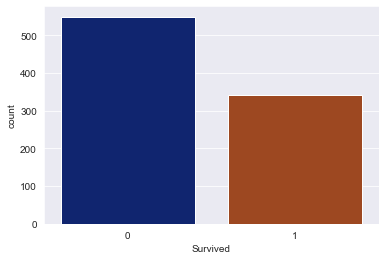

In [9]:
#Exploring the shape of our target (survived)
sns.set_style('darkgrid')

#You can't use countplot for numericalvalues, use for categorical
#Use distplot or histplot for numerical values
sns.countplot(x='Survived', data = titanic_train, palette='dark')

<AxesSubplot:xlabel='Survived', ylabel='count'>

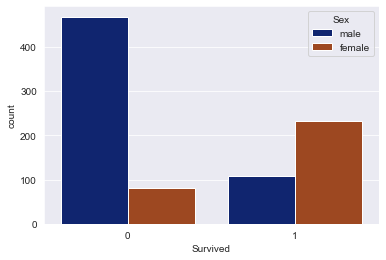

In [10]:
#hue helps us distinguish between the count
sns.set_style('darkgrid')

sns.countplot(x='Survived', hue='Sex', data = titanic_train, palette='dark')

<AxesSubplot:xlabel='Survived', ylabel='count'>

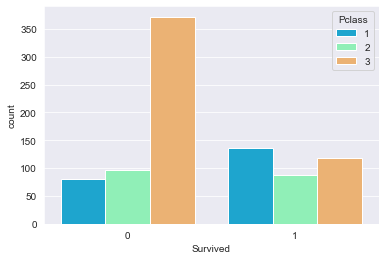

In [11]:
sns.set_style('darkgrid')

#countplot is used for categorical
sns.countplot(x='Survived', hue='Pclass', data = titanic_train, palette='rainbow')

In [12]:
Survived_Class = titanic_train.groupby(['Survived']).mean()

In [13]:
Survived_Class

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


C:\Users\mimee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

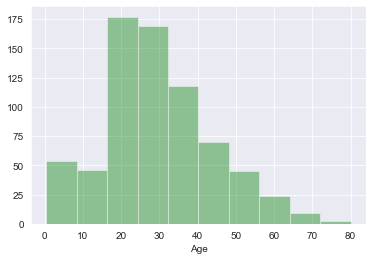

In [14]:
#distplot and hist is used for the numerical values
sns.distplot(titanic_train['Age'].dropna(), kde=False, color='green', bins=10)

<AxesSubplot:xlabel='Age', ylabel='Density'>

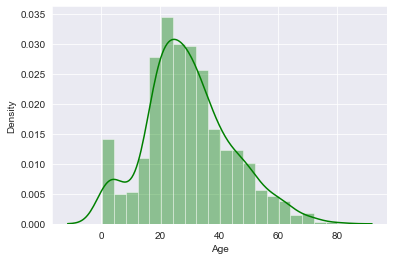

In [15]:
#distplot is used to to check the distribution of the data
sns.distplot(titanic_train['Age'].dropna(), color='green', bins=20)

<AxesSubplot:>

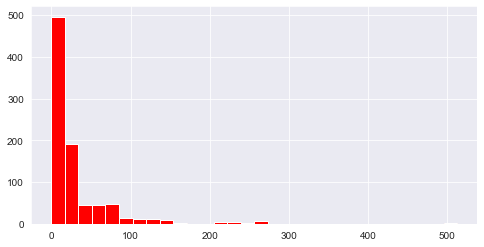

In [16]:
titanic_train['Fare'].hist(color='red', bins=30, figsize=(8, 4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

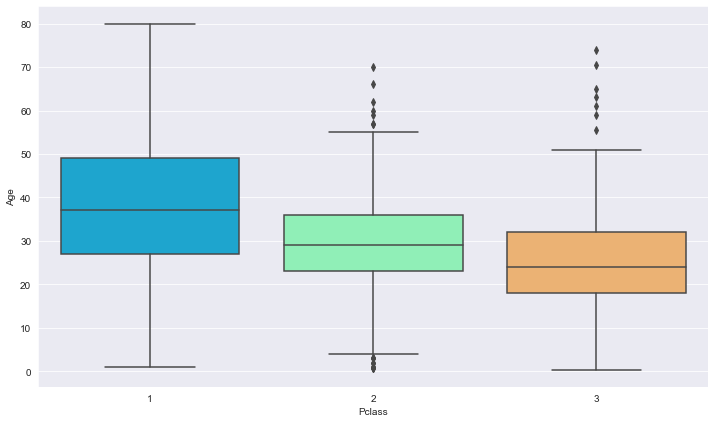

In [17]:
plt.figure(figsize=(12, 7))

sns.boxplot(x='Pclass', y='Age', data = titanic_train, palette='rainbow')

In [18]:
#filling the null values of the age
#we will fill each class with the mean of the age of the classes
titanic_train.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [19]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
        
    else:
        return Age

In [20]:
titanic_train['Age'] = titanic_train[['Age', 'Pclass']].apply(input_age, axis=1)

<AxesSubplot:>

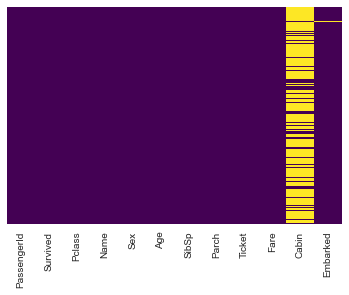

In [21]:
#confirming missing data has been filled
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [22]:
#Dropping Cabin feature
titanic_train.drop('Cabin', axis=1, inplace=True)

In [23]:
#Dropping the remaining null values/rows
titanic_train.dropna(inplace=True)

<AxesSubplot:>

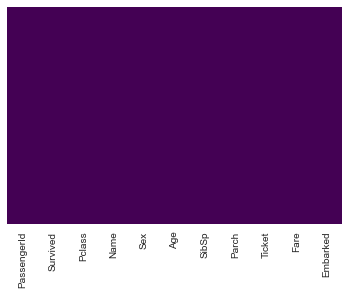

In [24]:
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [25]:
#Convert categorical features
#This creates new columns as we are using onehotencoding. The drop first removes the first column since it uses binary to do the encoding. simply, where one is present,
#the other isn't present.
sex = pd.get_dummies(titanic_train['Sex'], drop_first=True)

In [26]:
embark = pd.get_dummies(titanic_train['Embarked'])

In [27]:
pd.isnull(titanic_train['Age'])

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 889, dtype: bool

In [28]:
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


The One Hot Encoding doesnt remove the initial value

In [29]:
# Removing the strings from the Data Frame
titanic_train = titanic_train.drop(['Embarked', 'Sex', 'Name', 'Ticket'], axis=1)

In [30]:
#adding the new encoded value to the data frame
titanic_train = pd.concat([titanic_train, sex, embark], axis=1)

In [31]:
titanic_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


### Logistics Regression Model

In [32]:
#import the train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [33]:
X = titanic_train.drop('Survived', axis=1)
y = titanic_train['Survived']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
#import the Logistics regression model from scikit learn module
from sklearn.linear_model import LogisticRegression

In [36]:
#Instantiate the logistic regressor and fit the data
#fit_intercept means the line doesn't have to start from zero
#n_jobs deals with the computation power
logreg = LogisticRegression(n_jobs=1, fit_intercept=False)
#Train the model with the train data
logreg.fit(X_train, y_train)

C:\Users\mimee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(fit_intercept=False, n_jobs=1)

In [37]:
predictions = logreg.predict(X_test)

In [38]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [39]:
#Add a new column that holds the prediction to the X_test dataframe
X_test['Predicted_value'] = predictions
X_test.head()

<ipython-input-39-70ac0e3ea480>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Predicted_value'] = predictions


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,Predicted_value
511,512,3,25.0,0,0,8.05,1,0,0,1,0
613,614,3,25.0,0,0,7.75,1,0,1,0,0
615,616,2,24.0,1,2,65.00,0,0,0,1,1
337,338,1,41.0,0,0,134.50,0,1,0,0,1
718,719,3,25.0,0,0,15.50,1,0,1,0,0


In [40]:
#Include the Actual test to the X_test to compare your result
X_test['Actual_Value'] = y_test

<ipython-input-40-3a60e061c48d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Actual_Value'] = y_test



### You can use the *concat* command to include both columns (predictions and y_test) in one line of code


In [41]:
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,Predicted_value,Actual_Value
511,512,3,25.0,0,0,8.05,1,0,0,1,0,0
613,614,3,25.0,0,0,7.75,1,0,1,0,0,0
615,616,2,24.0,1,2,65.00,0,0,0,1,1,1
337,338,1,41.0,0,0,134.50,0,1,0,0,1,1
718,719,3,25.0,0,0,15.50,1,0,1,0,0,0


In [42]:
#checking the accuracy using confusion_matrix
from sklearn.metrics import confusion_matrix

In [43]:
#view the TP, TN, FP and FN
print(confusion_matrix(y_test, predictions))

[[147  16]
 [ 39  65]]


In [44]:
#Another accuracy checking function
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       163
           1       0.80      0.62      0.70       104

    accuracy                           0.79       267
   macro avg       0.80      0.76      0.77       267
weighted avg       0.80      0.79      0.79       267

